# 3: Statistical Analysis

## Feature Pre-processing

In the last section, we talked about how you can combine and transform data for the purpose of analysis. How do we achieve this? We need to have a clear understanding of what our input data is, and what we hope to achieve for our output, such that this can help inform our investigation. Therefore, we need to think about the input, the process, and the output. 

**How do we construct features from our data?** Essentially features can be thought of as numerical values, and quite often, we may just be counting data. If I wanted to derive a feature to measure RAM usage, or email usage, I would need to specify some time interval to observe (e.g., per hour, or per day). Much like when reporting speed, we would refer to miles per hour, rather than recording the absolute speed of the vehicle at every observation. In this way, we generalise to the time interval that makes most sense in practice (we could examine miles per minute, but it’s more natural to state 70 mph rather than 1.67 miles per minute). If I’m studying email usage, rather than simply just the number of emails sent, I may start to form some classifications of my features – for example, number of emails sent to unique recipients, number of emails sent to a specific individual, number of new recipients per day, number of words in each email, number of unique words in each email, and the list goes on. Hopefully you can start to see that there are many possible ways that we could derive numerical count features about email (and many other data observations). Crucially to remember is that we are interested in observations over time, so that we can compare time periods to understand where there may be an increase or decrease in the observed measure. As well as temporal features, we may be interested in spatial features – such as pixel locations in an image or GPS points on a map, or furthermore, we may be interested in sptiotemporal features – such as a pixel location in a video stream or a moving vehicle position.

**Finding and cleaning data?** There are a number of excellent resources for gathering example datasets, such as [Kaggle](https://www.kaggle.com/), the [VAST Challenge](https://vast-challenge.github.io/2024/) , the [UC Irvine Machine Learning repository](https://archive.ics.uci.edu/ml/index.php). Table 1 lists some useful dataset repositories and you will find numerous other examples hosted online and in various data repositories. 

<p style="text-align: center;"><b>Table 1: Dataset Repositories</b></p>

| Dataset Repository| Link |
|-----------------|-----------------|
| Kaggle   |https://www.kaggle.com/  |
| VAST 2024   | https://vast-challenge.github.io/2024/ |
| Recent VAST Datasets   | https://github.com/vast-challenge  |
| Older VAST Datasets   | https://visualdata.wustl.edu/varepository/benchmarks.php |
|UC Irvine Machine Learning repository|https://archive.ics.uci.edu/ml/index.php|
|Canadian Institute for Cybersecurity datasets|https://www.unb.ca/cic/datasets/index.html|
*This table lists some useful dataset repositories*

Whilst these are useful for learning about machine learning and visualisation, much of the hard work has already been done for us. **Web scraping** is often used to gather large amounts of data from online sources, for example, news story analysis, or examining CVE records. In such cases, there will be significant cleaning of data required, such as filtering out noise in the collected data, or correcting timestamps so that they are reported consistently. We will look at methods for cleaning data in our example practicals.

## Types of Anomalies

[Anomaly detection](https://www.datasciencecentral.com/profiles/blogs/anomaly-detection-for-the-oxford-data-science-for-iot-course) is widely discussed in terms of cyber security, and how “artificial intelligence can spot anomalies in your data”. However, it’s crucial to understand what we mean by anomalies, and what type of anomalies may exist. This will help us to understand what the anomalies actually mean to assess whether they pose some form of security concern. Here we will focus primarily on 3 types of outlier: point, contextual, and subsequence. In most applications here, we are thinking about [time-series anomalies](https://medium.com/cube-dev/time-series-anomaly-detection-algorithms-1cef5519aef2): essentially how something changes over time. 

- **Point anomaly:** This is where a single point in a time series is anomalous compared to the rest of the data. This is the most typical kind of anomaly that we may think of, yet if we are graphing the correct data, it is also the most straightforward to identify.
- **Contextual anomaly:** This is where a data instance in a time series is considered anomalous because of the context of the data. If we were measuring the temperature of different locations, and one location in the northern hemisphere reported low temperatures in the Summer, this may be an anomaly. Note that the temperature data alone is not sufficient to recognise this – we would need to have prior knowledge of temperature data for countries in the northern hemisphere during the Summer months, gathered historically, to be able to inform on the context here. Another example would be the presence of malware running on an infected machine, and the impact on CPU usage and process count. To recognise the anomaly here, we would need to know what the “typical” CPU usage and process count are in a state where the machine is deemed to be acting normally. In this manner, the anomaly is identified with respect to the historical data, where this observation may be much higher or much lower than the previous records. This historical data may be informed from some database of known anomalous (and non-anomalous) cases, or it may be informed directly from the data itself, where a repeating pattern is expected (e.g., seasonal).
- **Subsequence anomaly:** This is where a sequence of individual events are deemed to be anomalous with regards to the rest of the data, although the individual data points themselves are not deemed as anomalous. This could be seen as similar to contextual anomalies, however the key difference is that subsequence anomalies may not be out-of-distribution, whereas contextual anomalies would be. For example, a recurring pattern that then suddenly flattens for a period, and then begins again, would be recognised as an anomaly. Yet, each individual data point is well within the prior distribution of the data. It is only anomalous because the sequence, or pattern, is anomalous. Consider another example related to insider threat detection. An employee may conduct the following steps in an activity: (1) log into payment application, (2) retrieve payment details, (3) record item to be purchased, (4) enter payment details, and (5) send email to line manager. Each individual step may not be anomalous on their own (i.e., all legitimate actions). Likewise, they may be authorised to make purchases at any time of day, as needed. However if something changed in this sequence - e.g., suppose they stopped emailing line manager following payment, stopped recording item to be purchased; or added a new step – such as open notepad, and write purchase details to file – then there would be a cause for concern. As mentioned, here each individual activity is legitimate, however it is about observing a anomalous sequence of events, rather than an individual anomaly. Note how subsequence anomalies can be used for both numerical and discrete data – such as labels. Another example for text analytics could be, “The quick brown fox jumps over the lazy camel”. Many people will be familiar with this phrase, and will therefore recognise that the word camel is an anomaly – not because camel would necessarily be an incorrect statement, but because the well known quote would say ‘dog’.

![Alt text](./images/image8.png)

## Descriptive Statistics

Statistics are at the very heart of understanding the properties of data. There are some [core concepts](https://elearningindustry.com/stats-101-need-know-statistics) that you should therefore understand. Firstly, when we talk about a set of data, we may refer to this as a distribution – it is a set of measured observations that are indicative of real-world. The _mean_ is the average value of the distribution – for example, if I was assessing the number of network packets received per minute, then the mean would be the average number of packets received per minute. This could be used to estimate a baseline for the activity (i.e., the expected behaviour). The _median_ would then be the middle value of the distribution, if I arranged all values from lowest to highest. The _mode_ is the most common value that has occurred in the distribution.  Each of these gives us some indication of where the centre of our data lies – however each has its own weaknesses. If there are outliers in the data, the mean will be skewed by these – so a single point anomaly can change the mean completely. With the median, essentially only the first half of the data is counted (i.e., if I have n values I count up to the n/2 value) which means that the higher values are completely ignored. Therefore, it is good practice to assess all measures in case they help inform different stories about the data. The _standard deviation_ is also an important measurement to understand. This informs about the spread of the data – whether it is narrow around the centre point, or spread out across  the range of values (the range being essentially the difference between the largest and smallest values). In many applications, it is useful to consider the _normal_ distribution (sometimes referred to as a bell curve, or a Gaussian distribution). The normal distribution can be expressed by the mean to define the centre point, and the standard deviation to define the spread. This becomes particularly useful when we want to consider whether a new observation is deemed to be inside or outside of the distribution, since approximately 95% of the data observations should be within two (2) standard deviations of the mean. 

![Alt text](./images/image9.png)

## Comparing Data

Suppose we have four datasets that we wish to compare, to observe any deviations or anomalies that may occur. How may we approach this task? Let's assume that each dataset has two parameters (X and Y). We therefore have X1 and Y1 as dataset 1, X2 and Y2 as dataset 2, X3 and Y3 as dataset 3, and X4 and Y4 as dataset 4. We can use the code below to load in our sample dataset.

In [1]:
import pandas as pd

data = pd.read_csv('./data/anscombe.csv')
data

,X1,Y1,X2,Y2,X3,Y3,X4,Y4
0,10,8.04,10,9.14,10,7.46,8,6.58
1,8,6.95,8,8.14,8,6.77,8,5.76
2,13,7.58,13,8.74,13,12.74,8,7.71
3,9,8.81,9,8.77,9,7.11,8,8.84
4,11,8.33,11,9.26,11,7.81,8,8.47
5,14,9.96,14,8.10,14,8.84,8,7.04
6,6,7.24,6,6.13,6,6.08,8,5.25
7,4,4.26,4,3.10,4,5.39,19,12.50
8,12,10.84,12,9.13,12,8.15,8,5.56
9,7,4.82,7,7.26,7,6.42,8,7.91


First of all, we can calculate statistics for each of the four datasets to see how they may vary. We will try a set of common statistics in the next few cells, starting with the mean of both X and Y parameters, the variance of X and Y parameters, the correlation between X and Y parameters, and finally the line of best fit, or the regression line, of our X and Y parameters.

In [2]:
print ("Mean of X data:")
for i in ['X1', 'X2', 'X3', 'X4']:
    print (data[i].mean())

Mean of X data:
9.0
9.0
9.0
9.0


In [3]:
print ("Variance of X data:")
for i in ['X1', 'X2', 'X3', 'X4']:
    print (data[i].var())

Variance of X data:
11.0
11.0
11.0
11.0


In [4]:
print ("Mean of Y data:")
for i in ['Y1', 'Y2', 'Y3', 'Y4']:
    print (data[i].mean())

Mean of Y data:
7.500909090909093
7.50090909090909
7.5
7.500909090909091


In [5]:
print ("Variance of Y data:")
for i in ['Y1', 'Y2', 'Y3', 'Y4']:
    print (data[i].var())

Variance of Y data:
4.127269090909091
4.127629090909091
4.12262
4.12324909090909


In [6]:
print ("Correlation between X and Y:")
for i in [['X1','Y1'], ['X2','Y2'], ['X3','Y3'], ['X4','Y4']]:
    print (data[i].corr())

Correlation between X and Y:
          X1        Y1
X1  1.000000  0.816421
Y1  0.816421  1.000000
          X2        Y2
X2  1.000000  0.816237
Y2  0.816237  1.000000
          X3        Y3
X3  1.000000  0.816287
Y3  0.816287  1.000000
          X4        Y4
X4  1.000000  0.816521
Y4  0.816521  1.000000


In [7]:
from sklearn.linear_model import LinearRegression
for i in [['X1','Y1'], ['X2','Y2'], ['X3','Y3'], ['X4','Y4']]:
    lm = LinearRegression() 
    lm.fit(data[i[0]].values.reshape(-1, 1), data[i[1]].values.reshape(-1, 1))
    print(lm.coef_)

[[0.50009091]]
[[0.5]]
[[0.49972727]]
[[0.49990909]]


Having performed our initial analysis, what can we observe about our four datasets. What is particular intriguing in this example, is that all four datasets have exactly the same statistical characteristics! They all show the same mean for both X and Y, the same variance, correlation, and regression line. So, presumably are these datasets essentially all the same then?

This is a perfect case for data visualisation, and is actually a well-known problem known as Anscombe’s Quartet. When we visualise the data using four scatter plots, we can quickly determine that the four datasets are wildly different. However, on the surface, the descriptive statistics gave the same information. As data becomes increasingly large, we do need to use statistical measures and these are important, but it is also important that we do not rely on them solely. [Anscombe](https://www.sjsu.edu/faculty/gerstman/StatPrimer/anscombe1973.pdf) (1973) said:

> <span style="font-size:20px">*“Make both calculations and graphs. Both sorts of output should be studied; each will contribute to understanding - Anscombe”*</span>

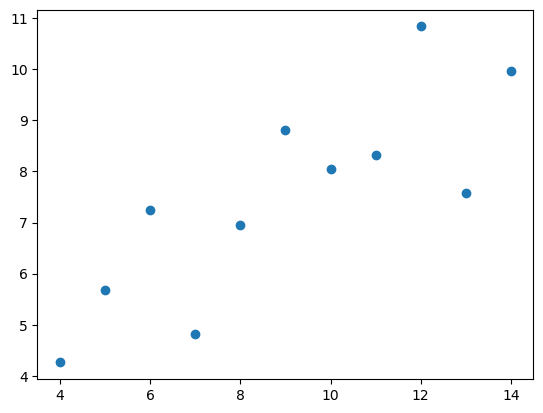

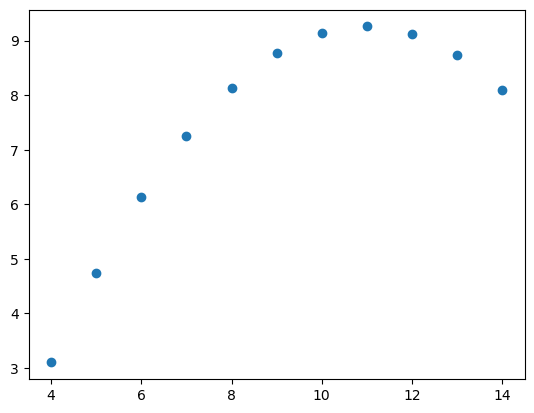

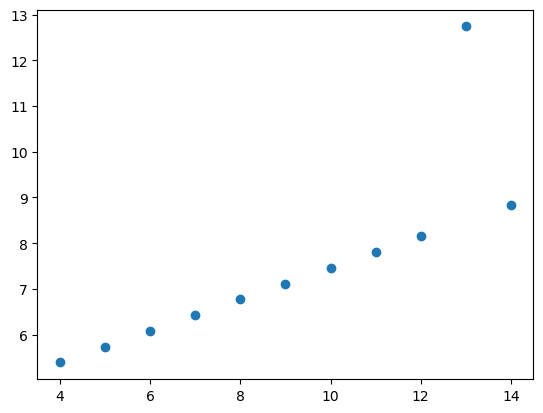

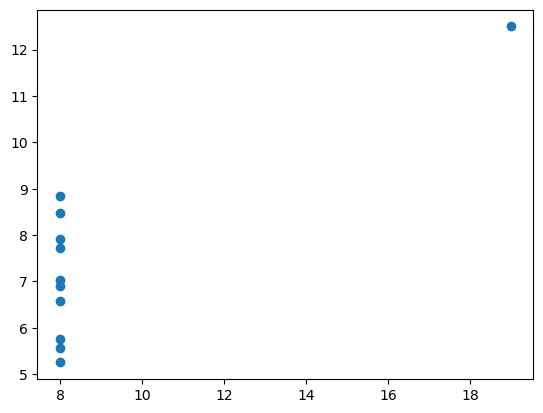

In [8]:
import matplotlib.pyplot as plt
for i in [['X1','Y1'], ['X2','Y2'], ['X3','Y3'], ['X4','Y4']]:
    plt.scatter(data[i[0]], data[i[1]])
    plt.show()

## Datasaurus Dozen

A modern take on the Anscombe quartet is the [Datasaurus Dozen](https://dl.acm.org/doi/10.1145/3025453.3025912). Given a distribution of points - in this example, a shape that looks remarkably like a dinosaur, the proposed system is able to use machine learning techniques (simulated annealing) to identify other configurations of the data points such that the underlying statistical properties match those of the original dataset. As the name suggests, the original depiction of a dinosaur can be mapped to 11 other data representations whilst also preserving the underlying stastistical properties. 

![Alt text](./images/image11.gif)

## Correlation does not imply Causation

As a final point for discussion in this section, it is important to recognise a golden rule when working with statistics, and that is [correlation does not imply causation](https://en.wikipedia.org/wiki/Correlation_does_not_imply_causation). Ice cream sales may increase when the weather is sunny, and likewise shark attacks may increase when the weather is sunny. However, shark attacks are not caused by ice cream sales (nor are ice cream sales caused by shark attacks). In this example, the hidden variable that both attributes rely on is sunny weather – although there are actually many other factors and neither case is caused by a single variable. There are many more [spurious correlations](http://www.tylervigen.com/spurious-correlations) and even [spurious research papers](https://tylervigen.com/spurious-scholar).

![Alt text](./images/image12.png)

When we are exploring data science for cyber security, we want to make well informed decisions from the data. It is important to recognise that attributes observed in the SOC may or may not necessarily be caused by other correlated attributes in your workforce. Further research explores [causal modelling in cyber security](https://www.astesj.com/publications/ASTESJ_050349.pdf) to determine how effective this can be.


![Alt text](./images/image13.png)

## Further reading

- [T. Mahmood and U. Afzal, "Security Analytics: Big Data Analytics for cybersecurity: A review of trends, techniques and tools," 2013 2nd National Conference on Information Assurance (NCIA), 2013, pp. 129-134, doi: 10.1109/NCIA.2013.6725337.](https://ieeexplore.ieee.org/document/6725337)
- [Weihs, C., Ickstadt, K. Data Science: the impact of statistics. Int J Data Sci Anal 6, 189–194 (2018). https://doi.org/10.1007/s41060-018-0102-5](https://link.springer.com/article/10.1007/s41060-018-0102-5)
- [Calude, C.S., Longo, G. The Deluge of Spurious Correlations in Big Data. Found Sci 22, 595–612 (2017). https://doi.org/10.1007/s10699-016-9489-4](https://link.springer.com/article/10.1007/s10699-016-9489-4)
- [Briggs, W.M. Common Statistical Fallacies. Journal of American Physicians and Surgeons, Volume 19, Number 2 (2014).](https://www.jpands.org/vol19no2/briggs.pdf)
- [Abel, S., Tang, Y., Singh, J. and Paek, E., 2020. Applications of causal modeling in cybersecurity: An exploratory approach. Advances in Science, Technology and Engineering Systems Journal, 5(3), pp.380-387.](https://www.astesj.com/publications/ASTESJ_050349.pdf)